# Website A/B Testing - Lab

## Introduction

In this lab, you'll get another chance to practice your skills at conducting a full A/B test analysis. It will also be a chance to practice your data exploration and processing skills! The scenario you'll be investigating is data collected from the homepage of a music app page for audacity.

## Objectives

You will be able to:
* Analyze the data from a website A/B test to draw relevant conclusions
* Explore and analyze web action data

## Exploratory Analysis

Start by loading in the dataset stored in the file 'homepage_actions.csv'. Then conduct an exploratory analysis to get familiar with the data.

> Hints:
    * Start investigating the id column:
        * How many viewers also clicked?
        * Are there any anomalies with the data; did anyone click who didn't view?
        * Is there any overlap between the control and experiment groups? 
            * If so, how do you plan to account for this in your experimental design?

In [144]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

df = pd.read_csv('homepage_actions.csv')
df

,timestamp,id,group,action
0,2016-09-24 17:42:27.839496,804196,experiment,view
1,2016-09-24 19:19:03.542569,434745,experiment,view
2,2016-09-24 19:36:00.944135,507599,experiment,view
3,2016-09-24 19:59:02.646620,671993,control,view
4,2016-09-24 20:26:14.466886,536734,experiment,view
...,...,...,...,...
8183,2017-01-18 09:11:41.984113,192060,experiment,view
8184,2017-01-18 09:42:12.844575,755912,experiment,view
8185,2017-01-18 10:01:09.026482,458115,experiment,view
8186,2017-01-18 10:08:51.588469,505451,control,view


In [9]:
#check for null values
df.isna().sum()

timestamp    0
id           0
group        0
action       0
dtype: int64

In [34]:
# investigate the timestamp column
df['timestamp'].min(), df['timestamp'].max()
# 4 months of data

('2016-09-24 17:42:27.839496', '2017-01-18 10:24:08.629327')

In [94]:
#check out id column
df['id'].value_counts()

id
750053    2
389447    2
283040    2
918794    2
208714    2
         ..
467818    1
629924    1
820336    1
424916    1
461199    1
Name: count, Length: 6328, dtype: int64

In [122]:
# create a set of viewers and clickers to get the intersection to see those viewers who clicked 
viewers = set(df[df['action'] == 'view']['id'])
clickers = set(df[df['action'] == 'click']['id'])

# intersection of viewers and clickers
v_and_c = viewers & clickers
len(v_and_c)

#1860 viewed and also clicked the website homepage

1860

In [125]:
# check if anyone clicked and did not view
viewers = set(df[df['action'] == 'view']['id'])
clickers = set(df[df['action'] == 'click']['id'])

c_not_v = clickers - viewers
len(c_not_v)

# 0 clicked without viewing

0

In [132]:
# check for overlap btn experimental and control groups

experiment_id = df[df['group'] == 'experiment']['id'].drop_duplicates()
control_id = df[df['group'] == 'control']['id'].drop_duplicates()
len(experiment_id), len(control_id)

(2996, 3332)

In [134]:
# perform an Inner join to find common IDs
overlap_df = pd.merge(control_id, experiment_id, on='id', how='inner')
overlap_df

,id


In [135]:
# Get the number of unique overlapping IDs
num_overlap = overlap_df['id'].nunique()
num_overlap

#There is no overlap

0

In [12]:
# checkout group column
df['group'].value_counts()

group
control       4264
experiment    3924
Name: count, dtype: int64

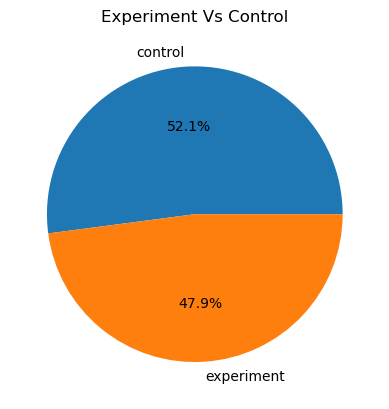

In [136]:
plt.pie(df['group'].value_counts(), autopct='%1.1f%%', labels=df['group'].value_counts().index)
plt.title('Experiment Vs Control');

In [13]:
# checkout action
df['action'].value_counts()

action
view     6328
click    1860
Name: count, dtype: int64

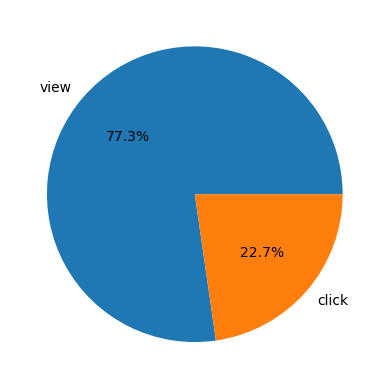

In [44]:
plt.pie(df['action'].value_counts().values, autopct='%1.1f%%', labels=df['action'].value_counts().index);

In [27]:
# get control group and inspect it further
control = df[df['group'] == 'control']
control

,timestamp,id,group,action
3,2016-09-24 19:59:02.646620,671993,control,view
9,2016-09-24 21:00:12.278374,560027,control,view
23,2016-09-25 00:25:14.141290,281985,control,view
24,2016-09-25 01:14:48.603202,407864,control,view
25,2016-09-25 02:16:11.046654,342984,control,view
...,...,...,...,...
8178,2017-01-18 08:17:12.675797,616692,control,view
8181,2017-01-18 09:07:37.661143,795585,control,view
8182,2017-01-18 09:09:17.363917,795585,control,click
8186,2017-01-18 10:08:51.588469,505451,control,view


In [30]:
# investigate the number of clicks and views in control group
control['action'].value_counts()

action
view     3332
click     932
Name: count, dtype: int64

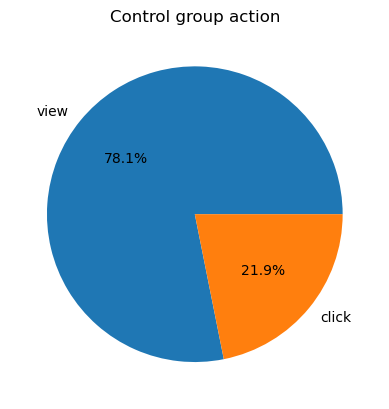

In [53]:
plt.pie(control['action'].value_counts(), autopct='%1.1f%%', labels=control['action'].value_counts().index)
plt.title('Control group action');

In [54]:
# experimental Group
experiment = df[df['group'] == 'experiment']
experiment

,timestamp,id,group,action
0,2016-09-24 17:42:27.839496,804196,experiment,view
1,2016-09-24 19:19:03.542569,434745,experiment,view
2,2016-09-24 19:36:00.944135,507599,experiment,view
4,2016-09-24 20:26:14.466886,536734,experiment,view
5,2016-09-24 20:32:25.712659,681598,experiment,view
...,...,...,...,...
8179,2017-01-18 08:53:50.910310,615849,experiment,view
8180,2017-01-18 08:54:56.879682,615849,experiment,click
8183,2017-01-18 09:11:41.984113,192060,experiment,view
8184,2017-01-18 09:42:12.844575,755912,experiment,view


In [57]:
experiment['action'].value_counts()

action
view     2996
click     928
Name: count, dtype: int64

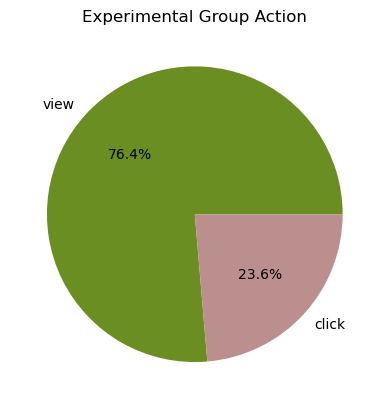

In [66]:
plt.pie(experiment['action'].value_counts(), labels=experiment['action'].value_counts().index, autopct='%1.1f%%',colors=['olivedrab', 'rosybrown'])
plt.title('Experimental Group Action');

## Conduct a Statistical Test

Conduct a statistical test to determine whether the experimental homepage was more effective than that of the control group.

In [137]:
#H_0 : experimental page is same as control page
#H_1 : experimental page is more effective

In [146]:
# create count column
df['count'] = 1
df

,timestamp,id,group,action,count
0,2016-09-24 17:42:27.839496,804196,experiment,view,1
1,2016-09-24 19:19:03.542569,434745,experiment,view,1
2,2016-09-24 19:36:00.944135,507599,experiment,view,1
3,2016-09-24 19:59:02.646620,671993,control,view,1
4,2016-09-24 20:26:14.466886,536734,experiment,view,1
...,...,...,...,...,...
8183,2017-01-18 09:11:41.984113,192060,experiment,view,1
8184,2017-01-18 09:42:12.844575,755912,experiment,view,1
8185,2017-01-18 10:01:09.026482,458115,experiment,view,1
8186,2017-01-18 10:08:51.588469,505451,control,view,1


In [141]:
# experiment group action count
experiment['action'].value_counts().sum()

3924

## Verifying Results

One sensible formulation of the data to answer the hypothesis test above would be to create a binary variable representing each individual in the experiment and control group. This binary variable would represent whether or not that individual clicked on the homepage; 1 for they did and 0 if they did not. 

The variance for the number of successes in a sample of a binomial variable with n observations is given by:

## $n\bullet p (1-p)$

Given this, perform 3 steps to verify the results of your statistical test:
1. Calculate the expected number of clicks for the experiment group, if it had the same click-through rate as that of the control group. 
2. Calculate the number of standard deviations that the actual number of clicks was from this estimate. 
3. Finally, calculate a p-value using the normal distribution based on this z-score.

### Step 1:
Calculate the expected number of clicks for the experiment group, if it had the same click-through rate as that of the control group. 

In [ ]:
#Your code here

### Step 2:
Calculate the number of standard deviations that the actual number of clicks was from this estimate.

In [ ]:
#Your code here

### Step 3: 
Finally, calculate a p-value using the normal distribution based on this z-score.

In [ ]:
#Your code here

### Analysis:

Does this result roughly match that of the previous statistical test?

> Comment: **Your analysis here**

## Summary

In this lab, you continued to get more practice designing and conducting AB tests. This required additional work preprocessing and formulating the initial problem in a suitable manner. Additionally, you also saw how to verify results, strengthening your knowledge of binomial variables, and reviewing initial statistical concepts of the central limit theorem, standard deviation, z-scores, and their accompanying p-values.